<a href="https://colab.research.google.com/github/singhvikasguru/BT/blob/master/Chq_nchq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

    100% |████████████████████████████████| 993kB 15.4MB/s 


In [0]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link='https://drive.google.com/file/d/15AqNav9cQVa70tmOun0pp30f89OxlCk-/view?usp=sharing'
fluff, id = link.split('=')

In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Non Cheque Image.zip')  

In [0]:
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

E: Package 'python-software-properties' has no installation candidate


In [0]:
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

··········


In [0]:
!mkdir gdrive
!google-drive-ocamlfuse gdrive
!ls gdrive
!cd gdrive

mkdir: cannot create directory ‘gdrive’: File exists
fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option
 Chq_nchq.ipynb   Data	'Getting started'


In [0]:
!ls gdrive
!cd gdrive/Data
!ls gdrive/Data

 Chq_nchq.ipynb   Data	'Getting started'
'Non Cheque Image.zip'	 PngDocument_26dec.zip


In [0]:
import zipfile
a=!unzip gdrive/Data/PngDocument_26dec.zip
a2=!unzip gdrive/Data/Non\ Cheque\ Image.zip

In [0]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
import gc
import glob
import matplotlib.image as mping
import seaborn as sns
from sklearn.model_selection import train_test_split

#model import
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

Using TensorFlow backend.


In [0]:

chq_images=[]
for x in a[2:3002]:
  sp=x.split(':')
  sp2=sp[1]
  sp2=sp2.strip()
  chq_images.append(cv2.imread(sp2))

In [0]:
nchq_images=[]
for x in a2[2:2202]:
  sp=x.split(':')
  sp2=sp[1]
  sp2=sp2.strip()
  nchq_images.append(cv2.imread(sp2))

In [0]:

fchq_images=chq_images[0:1500]
del chq_images
gc.collect()

145

In [0]:
print(len(fchq_images))
print(len(nchq_images))

1500
2200


In [0]:
n=1400
train_images=nchq_images[:n]+fchq_images[:int(n)]
train_labels=[0 for x in range(0, n)]
for i in range(0, int(n)):
    train_labels.append(1)
zip_train=list(zip(train_images, train_labels))
random.shuffle(zip_train)
train_images, train_labels=zip(*zip_train)

test_images=fchq_images[n:(n+100)]+nchq_images[n:(n+100)]

del fchq_images
del nchq_images
gc.collect()

250

In [0]:
nrows=150
ncols=150
channels=1 # 3 if colour image is needed
X=[]
X_test=[]
for img in train_images:
    X.append(cv2.resize(img, (nrows, ncols), interpolation=cv2.INTER_CUBIC))
for img in test_images:
    X_test.append(cv2.resize(img, (nrows, ncols), interpolation=cv2.INTER_CUBIC))
Y=train_labels
Y=np.asarray(Y)
X=np.asarray(X)
X_test=np.asarray(X_test)

del train_images
gc.collect()

41

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5, 1.0, 'Labels')

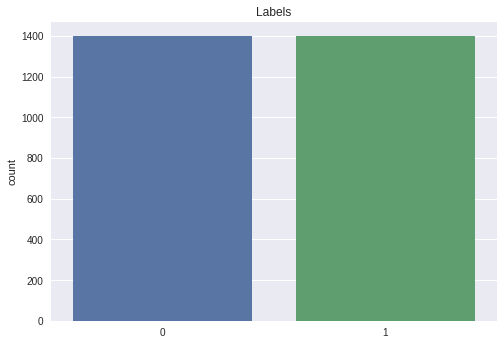

In [0]:
sns.countplot(Y)
plt.title("Labels")    

In [0]:
X_train, X_val, y_train, y_val=train_test_split(X, Y, test_size=0.2, random_state=2)

del X
del Y
gc.collect()

0

In [0]:
model=models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
train_datagen=ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen=ImageDataGenerator(rescale=1./255)

batch_size=32
train_genrator=train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_genrator=val_datagen.flow(X_val, y_val, batch_size=batch_size)
history=model.fit_generator(train_genrator, steps_per_epoch=X_train.shape[0]//batch_size, epochs=64, validation_data=val_genrator, validation_steps=X_val.shape[0]//batch_size)


Instructions for updating:
Use tf.cast instead.
Epoch 1/16
70/70 [==============================] - 20s 288ms/step - loss: 0.6596 - acc: 0.5795 - val_loss: 0.6111 - val_acc: 0.6029
Epoch 2/16
70/70 [==============================] - 15s 214ms/step - loss: 0.5810 - acc: 0.6960 - val_loss: 0.6410 - val_acc: 0.5928
Epoch 3/16
70/70 [==============================] - 15s 213ms/step - loss: 0.5356 - acc: 0.7388 - val_loss: 0.6070 - val_acc: 0.6439
Epoch 4/16
70/70 [==============================] - 15s 214ms/step - loss: 0.5040 - acc: 0.7455 - val_loss: 0.4540 - val_acc: 0.8011
Epoch 5/16
70/70 [==============================] - 15s 210ms/step - loss: 0.4894 - acc: 0.7612 - val_loss: 0.4275 - val_acc: 0.8106
Epoch 6/16
70/70 [==============================] - 15s 212ms/step - loss: 0.4742 - acc: 0.7683 - val_loss: 0.4557 - val_acc: 0.7879
Epoch 7/16
70/70 [==============================] - 15s 211ms/step - loss: 0.4693 - acc: 0.7812 - val_loss: 0.3509 - val_acc: 0.8485
Epoch 8/16
70/70 [===

In [0]:
model.save_weights('chq_nchq_model_weights_2000_3.h5')
model.save('chq_nchq_model_keras_2000_3.h5')

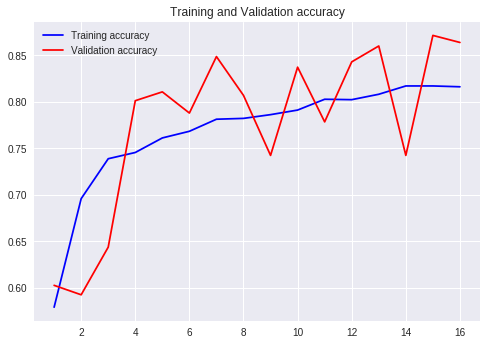

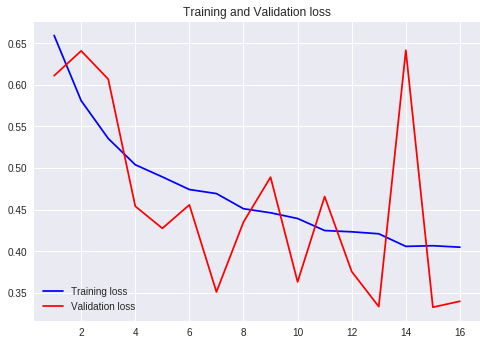

In [0]:
acc=history.history['acc']
val_acc=history.history['val_acc'] 
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1, len(acc)+1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [0]:
y_pred=model.predict(X_test)
label_pred=[]
for x in y_pred:
    if x>0.5:
        label_pred.append('Cheque')
    else:
        label_pred.append('Not-Cheque')

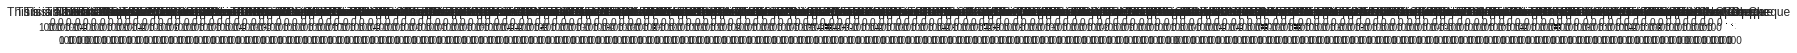

In [0]:
test_datagen = ImageDataGenerator(rescale=1./255)
x=X_test
columns=2*100 
i = 0
text_labels = []
predl=[]
plt.figure(figsize=(30,20))
for batch in test_datagen.flow(x, batch_size=1):
    pred = model.predict(batch)
    predl.append(pred)
    if pred > 0.5:
        text_labels.append('Cheque')
    else:
        text_labels.append('Non-Cheque')
    plt.subplot(2*100 / columns + 1, columns, i + 1)
    plt.title('This is a ' + text_labels[i])
    imgplot = plt.imshow(batch[0])
    i+=1
    if i%200==0:
        break;

plt.show()

In [0]:
ind=[x for x in range(0, 200)]
aa=list(zip(ind, label_pred, text_labels))

In [0]:
print(aa)
print(label_pred)
print(text_labels)

[(0, 'Cheque', 'Non-Cheque'), (1, 'Cheque', 'Non-Cheque'), (2, 'Cheque', 'Non-Cheque'), (3, 'Cheque', 'Cheque'), (4, 'Cheque', 'Cheque'), (5, 'Cheque', 'Cheque'), (6, 'Cheque', 'Non-Cheque'), (7, 'Cheque', 'Cheque'), (8, 'Not-Cheque', 'Non-Cheque'), (9, 'Cheque', 'Cheque'), (10, 'Cheque', 'Cheque'), (11, 'Not-Cheque', 'Non-Cheque'), (12, 'Cheque', 'Cheque'), (13, 'Cheque', 'Cheque'), (14, 'Cheque', 'Cheque'), (15, 'Cheque', 'Cheque'), (16, 'Cheque', 'Cheque'), (17, 'Cheque', 'Cheque'), (18, 'Cheque', 'Non-Cheque'), (19, 'Cheque', 'Non-Cheque'), (20, 'Cheque', 'Cheque'), (21, 'Cheque', 'Cheque'), (22, 'Cheque', 'Cheque'), (23, 'Cheque', 'Non-Cheque'), (24, 'Cheque', 'Non-Cheque'), (25, 'Cheque', 'Cheque'), (26, 'Cheque', 'Cheque'), (27, 'Cheque', 'Cheque'), (28, 'Cheque', 'Cheque'), (29, 'Cheque', 'Cheque'), (30, 'Cheque', 'Non-Cheque'), (31, 'Cheque', 'Cheque'), (32, 'Cheque', 'Non-Cheque'), (33, 'Cheque', 'Non-Cheque'), (34, 'Cheque', 'Cheque'), (35, 'Cheque', 'Cheque'), (36, 'Cheque'